# qLearn Week 3 - Single-Qubit Gates
In lecture, we introduced quantum circuits and some basic single-qubit gates

In [23]:
# Installing and Importing Necessary Libraries

# Install PennyLane if it's not already installed
# Uncomment the line below to install PennyLane in the Jupyter environment
#%pip install pennylane --upgrade

# Importing PennyLane library to create and execute quantum circuits
import pennylane as qml
dev = qml.device('default.qubit',wires=1)
# Import NumPy from PennyLane, which is required for some quantum calculations
from pennylane import numpy as np

# Import visualization for plotting Bloch spheres if desired (using matplotlib here)
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [24]:
# Helper function to plot probabilities as a bar chart
def plot_probabilities(state):
    # Calculate probabilities as the square of the amplitude magnitudes
    probabilities = [np.abs(amplitude)**2 for amplitude in state]
    
    # Define labels for |0⟩ and |1⟩ states
    labels = ["|0⟩", "|1⟩"]
    x = np.arange(len(labels))

    # Create the bar chart with probability labels
    fig, ax = plt.subplots(figsize=(6, 4))
    bars = ax.bar(x, probabilities, color=['blue'])
    
    # Add probability percentage labels on each bar
    for bar, prob in zip(bars, probabilities):
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f"{prob * 100:.1f}%",
            ha='center',
            va='bottom'
        )
    
    # Add labels and title
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.set_ylabel('Probability')
    ax.set_title('Measurement Probabilities')
    plt.show()


In [25]:
# Helper function to plot a state on the Bloch sphere
def plot_bloch_sphere(state):
    # Extract the real and imaginary parts of the state vector
    alpha, beta = state[0], state[1]
    
    # Compute Bloch sphere coordinates
    x = 2 * np.real(np.conj(alpha) * beta)
    y = 2 * np.imag(np.conj(alpha) * beta)
    z = np.abs(alpha)**2 - np.abs(beta)**2
    
    # Plotting
    fig = plt.figure(figsize=(6, 6))
    ax = fig.add_subplot(111, projection='3d', azim=30, elev=30)
    ax.plot([0, x], [0, y], [0, z], color='r', lw=2)  # Bloch vector
    
    # Draw the sphere
    u = np.linspace(0, 2 * np.pi, 100)
    v = np.linspace(0, np.pi, 50)
    xs = np.outer(np.cos(u), np.sin(v))
    ys = np.outer(np.sin(u), np.sin(v))
    zs = np.outer(np.ones(np.size(u)), np.cos(v))
    ax.plot_surface(xs, ys, zs, color='c', alpha=0.1, linewidth=0)
    
    # Set labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title("Bloch Sphere Representation")
    plt.show()


## 1. X & H Gates
### Introduction
In this section, we will explore two fundamental single-qubit gates in quantum computing: the Pauli-X (X) gate and the Hadamard (H) gate. We will use Qiskit to create a simple quantum circuit, apply these gates, and visualize the results. 

### 1.1 Pauli-X Gate 
The X gate is the quantum equivalent of the classical NOT gate. It flips the state of a qubit:

->|0⟩ becomes |1⟩  
->|1⟩ becomes |0⟩ 

State after applying X gate: [0.+0.j 1.+0.j]


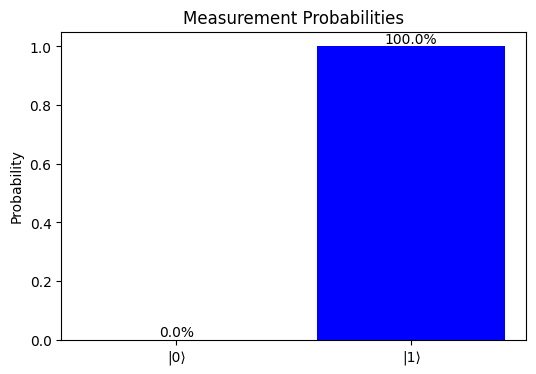

In [26]:
# Define a quantum function to apply the X gate and visualize the amplitudes
@qml.qnode(dev)
def apply_x_gate():
    qml.PauliX(wires=0)  # Apply X gate
    return qml.state()

# Get the state after applying X gate
state = apply_x_gate()
print("State after applying X gate:", state)

# Plot the amplitudes of the resulting state
plot_probabilities(state)

# Plot the resulting state on the Bloch sphere
#plot_bloch_sphere(state)

### 1.2 Hadamard Gate 
The H gate creates a superposition state from a classical bit: 
 
->|0⟩ becomes (|0⟩ + |1⟩)/√2 = |+⟩  
->|1⟩ becomes (|0⟩ - |1⟩)/√2 = |-⟩  


State after applying H gate: [0.70710678+0.j 0.70710678+0.j]


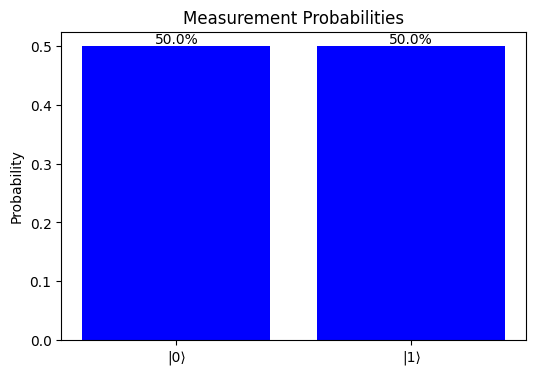

In [27]:
# Define the quantum function for Hadamard gate and visualize on Bloch sphere
@qml.qnode(dev)
def apply_h_gate():
    qml.Hadamard(wires=0)  # Apply Hadamard gate
    return qml.state()

# Get the state after applying H gate
state = apply_h_gate()
print("State after applying H gate:", state)

# Plot the amplitudes of the resulting state
plot_probabilities(state)

# Plot the resulting state on the Bloch sphere
#plot_bloch_sphere(state)


## 1.3 Challenges
Now your turn! Use your knowledge of Hadamard and X gates to create the |+⟩ and |-⟩ qubit states.

State after creating |+>: [1.+0.j 0.+0.j]


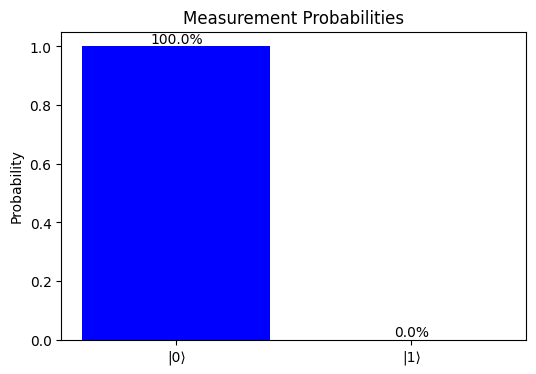

In [28]:
#Plus state

@qml.qnode(dev)
def create_plus_state():
    #######################
    #   YOUR CODE HERE    #
    #######################

    return qml.state()

# Get the state after creating |+>
plus_state = create_plus_state()
print("State after creating |+>:", plus_state) #Hint, the vector output of the plus state should be [0.70710678+0.j 0.70710678+0.j]

# Plot the probabilities of measuring |0⟩ or |1⟩ in the |+> state
plot_probabilities(plus_state)

# Plot the resulting state on the Bloch sphere
#plot_bloch_sphere(state)


State after creating |->: [1.+0.j 0.+0.j]


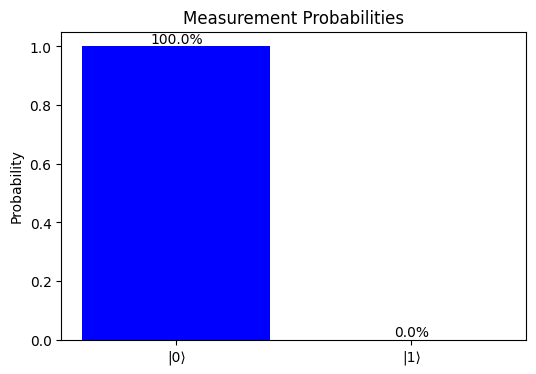

In [29]:
@qml.qnode(dev)
def create_minus_state():
    #######################
    #   YOUR CODE HERE    #
    #######################

    return qml.state()

# Get the state after creating |->
minus_state = create_minus_state()
print("State after creating |->:", minus_state)#Hint, the vector output of the plus state should be [ 0.70710678+0.j -0.70710678+0.j]

# Plot the probabilities of measuring |0⟩ or |1⟩ in the |-> state
plot_probabilities(minus_state)

# Plot the resulting state on the Bloch sphere
#plot_bloch_sphere(state)


## 2.0 Rotation Gates

In this section we will discuss the X,Y,Z quantum rotational gates.

### 2.1 RZ Gate
The RZ gate rotates the qubit state around z-axis by an angle &theta;.

[ 1.+0.j -0.+0.j]


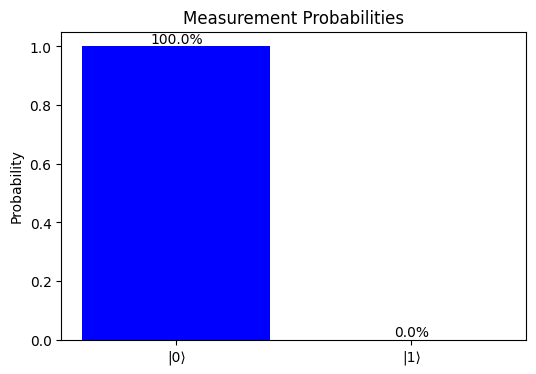

In [30]:
@qml.qnode(dev)
def z_gate_circuit():
    qml.PauliZ(wires=0)
    return qml.state()

print(z_gate_circuit())

# Plot the amplitudes of the resulting state
plot_probabilities(z_gate_circuit())

# Plot the resulting state on the Bloch sphere
#plot_bloch_sphere(z_gate_circuit())


### 2.2 RX Gate
The RX gate rotates the qubit state around the x-axis by an angle &theta;.

[0.70710678+0.j         0.        -0.70710678j]


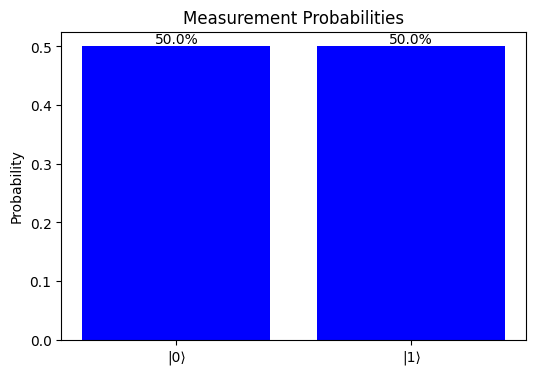

In [31]:
@qml.qnode(dev)
def rx_gate_circuit(theta):
    qml.RX(theta, wires=0)
    return qml.state()

print(rx_gate_circuit(np.pi/2))

# Plot the amplitudes of the resulting state
plot_probabilities(rx_gate_circuit(np.pi/2))

# Plot the resulting state on the Bloch sphere
#plot_bloch_sphere(rx_gate_circuit(np.pi/2))


### 2.3 RY Gate
The Ry gate rotates the qubit state around the Y-axis by an angle &theta;.

[0.70710678+0.j 0.70710678+0.j]


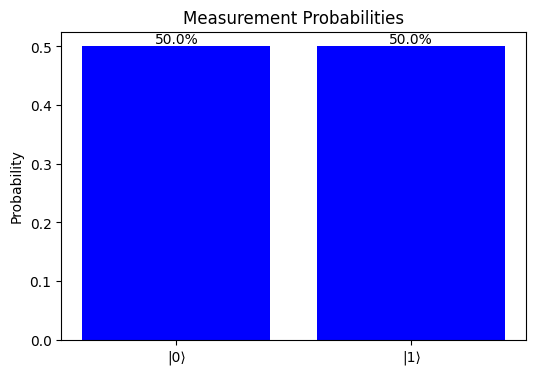

In [32]:
@qml.qnode(dev)
def ry_gate_circuit(theta):
    qml.RY(theta, wires=0)
    return qml.state()

print(ry_gate_circuit(np.pi/2))

# Plot the amplitudes of the resulting state
plot_probabilities(ry_gate_circuit(np.pi/2))

# Plot the resulting state on the Bloch sphere
#plot_bloch_sphere(ry_gate_circuit(np.pi/2))

### 2.4 Challenge: Universal Parameterization Unitary
Given angles &phi;, &theta;, and &omega;, create a universal parameterizted unitary using only Rz, Rx, Ry gates

[1.+0.j 0.+0.j]


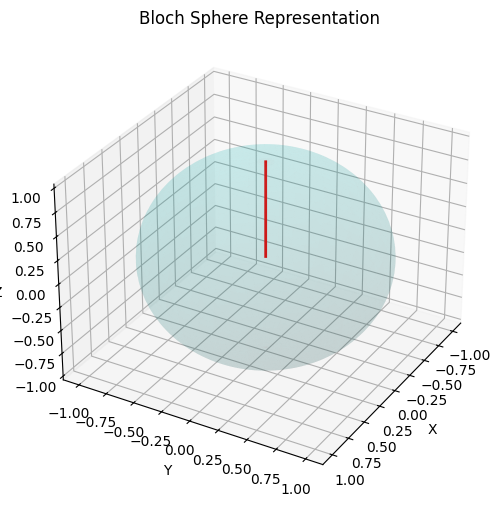

In [33]:
@qml.qnode(dev)
def universal_unitary(phi, theta, omega):
    #######################
    #   YOUR CODE HERE    #
    #######################
    
    return qml.state()

# Example angles
phi = np.pi/3
theta = np.pi/4
omega = np.pi/6

print(universal_unitary(phi, theta, omega))

# Plot the amplitudes of the resulting state
#plot_probabilities(universal_unitary(phi, theta, omega))

# Plot the resulting state on the Bloch sphere
plot_bloch_sphere(universal_unitary(phi, theta, omega))